## Diabetic Foot Ulcer Data Analysis

In [2]:
# Importing libraries
# Data
import pandas as pd
# Model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import BayesianRidge,LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler



# Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading Data
Data = pd.read_csv("Clinical and Immuno_Data.csv")
Data

,Patient ID,Age,BMI,HbA1c,FBS (mg/dl),PPBS (mg/dl),Ulcer Stage,Ulcer healing status,Total Cholesterol (mg/dl),HDL Cholesterol (mg/dl),...,MFI CD15+ HLA-DR,MFI CD15+ CD11b,MFI CD14+ CD16,MFI CD14+ CD62L,MFI CD14+ CD63,MFI CD14+ CD282,MFI CD14+ CD284,MFI CD14+ CD36,MFI CD14+ HLA-DR,MFI CD14+ CD11b
0,I-05,68,25.30,6.7,112,143,1,1,140,27.4,...,16.40,269.70,18.60,60.60,63.69,78.20,94.50,528.79,328.00,141.50
1,I-06,68,21.50,6.9,81,224,1,1,122,43.9,...,2.70,78.10,10.70,174.80,33.90,32.90,80.60,452.00,173.00,91.80
2,I-08,62,24.60,8.0,83,198,1,0,99,32.1,...,1.00,5659.50,4.80,202.00,24.80,37.80,16.90,481.00,348.50,2837.50
3,I-09,44,26.90,13.2,136,271,1,0,93,38.5,...,0.00,346.50,18.40,739.00,46.10,51.70,388.00,305.00,1967.00,402.10
4,I-10,58,18.90,8.2,116,124,1,1,145,48.5,...,0.00,113.60,11.47,406.00,25.00,44.77,86.00,481.00,0.00,428.90
5,I-12,57,26.22,10.2,210,322,1,1,120,25.3,...,0.00,1446.50,14.00,199.80,18.80,579.00,37.80,451.00,92.30,805.50
6,I-14,57,25.00,11.1,245,347,1,1,153,33.5,...,0.00,749.00,0.00,68.90,63.30,246.00,44.10,1381.00,15.40,620.30
7,I-16,59,24.01,10.5,156,305,1,0,138,27.1,...,1.65,911.30,0.00,248.62,12.90,248.70,43.92,639.00,167.00,656.30
8,I-17,49,30.82,10.7,134,202,1,1,246,42.8,...,0.00,1947.00,0.00,281.06,0.00,419.00,30.36,1119.00,160.00,1814.50
9,I-18,52,21.35,8.4,120,253,1,0,166,37.5,...,0.00,77.50,116.00,254.00,71.70,379.00,8.73,593.00,1147.00,589.00


In [4]:
Data.columns

Index(['Patient ID', 'Age', 'BMI', 'HbA1c ', 'FBS (mg/dl)', 'PPBS (mg/dl)',
       'Ulcer Stage ', 'Ulcer healing status', 'Total Cholesterol (mg/dl)',
       'HDL Cholesterol (mg/dl)', 'LDL Cholesterol (mg/dl)',
       'S. Triglycerides (mg/dl)', 'VLDL Cholesterol (mg/dl)',
       'Total Chol/HDL Chol', 'ESR', 'Alkaline Phosphatase (IU/L)', '% CD14+',
       '% CD15 High', '%CD15 - medium', 'MFI CD15+ CD16', 'MFI CD15+ CD62L',
       'MFI CD15+ CD63', 'MFI CD15+ CD282', 'MFI CD15+ CD284',
       'MFI CD15+ HLA-DR', 'MFI CD15+ CD11b', 'MFI CD14+ CD16',
       'MFI CD14+ CD62L', 'MFI CD14+ CD63', 'MFI CD14+ CD282',
       'MFI CD14+ CD284', 'MFI CD14+ CD36', 'MFI CD14+ HLA-DR',
       'MFI CD14+ CD11b'],
      dtype='object')

In [5]:
Data.describe()

,Age,BMI,HbA1c,FBS (mg/dl),PPBS (mg/dl),Ulcer Stage,Ulcer healing status,Total Cholesterol (mg/dl),HDL Cholesterol (mg/dl),LDL Cholesterol (mg/dl),...,MFI CD15+ HLA-DR,MFI CD15+ CD11b,MFI CD14+ CD16,MFI CD14+ CD62L,MFI CD14+ CD63,MFI CD14+ CD282,MFI CD14+ CD284,MFI CD14+ CD36,MFI CD14+ HLA-DR,MFI CD14+ CD11b
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,54.365385,26.484423,9.511538,156.557692,233.423077,1.423077,0.365385,148.461538,35.950000,92.846154,...,7.835577,1366.666538,55.926346,431.362500,68.924038,416.889808,31.362885,896.116346,882.929615,1230.984615
std,8.825162,4.147876,1.692967,53.028077,81.763491,0.498867,0.486236,42.812616,7.666262,34.352489,...,12.642572,1010.284428,85.826479,406.678249,61.182476,356.870424,59.679625,574.486057,724.195818,850.252502
min,38.000000,18.900000,5.700000,74.000000,100.000000,1.000000,0.000000,77.000000,20.500000,20.000000,...,0.000000,77.500000,0.000000,0.000000,0.000000,0.000000,0.000000,76.220000,0.000000,91.800000
25%,47.750000,23.565000,8.400000,118.750000,179.000000,1.000000,0.000000,116.000000,31.050000,70.000000,...,0.000000,647.000000,0.000000,155.225000,29.725000,157.625000,0.000000,480.970000,312.250000,542.000000
50%,53.500000,26.455000,9.350000,150.500000,221.000000,1.000000,0.000000,141.500000,34.750000,92.000000,...,0.000000,1232.150000,15.000000,291.030000,59.350000,295.500000,12.230000,647.500000,677.500000,1133.000000
75%,61.000000,28.997500,10.625000,183.500000,266.750000,2.000000,1.000000,167.750000,41.075000,111.250000,...,15.900000,1803.375000,99.800000,560.250000,89.750000,579.750000,41.827500,1218.297500,1304.607500,1817.700000
max,70.000000,37.850000,13.200000,336.000000,527.000000,2.000000,1.000000,281.000000,56.200000,186.000000,...,54.000000,5659.500000,478.000000,1663.300000,373.000000,1437.000000,388.000000,2502.000000,3013.000000,3067.500000


In [6]:
Data.dtypes

Patient ID                      object
Age                              int64
BMI                            float64
HbA1c                          float64
FBS (mg/dl)                      int64
PPBS (mg/dl)                     int64
Ulcer Stage                      int64
Ulcer healing status             int64
Total Cholesterol (mg/dl)        int64
HDL Cholesterol (mg/dl)        float64
LDL Cholesterol (mg/dl)          int64
S. Triglycerides (mg/dl)         int64
VLDL Cholesterol (mg/dl)         int64
Total Chol/HDL Chol              int64
ESR                              int64
Alkaline Phosphatase (IU/L)      int64
% CD14+                        float64
% CD15 High                    float64
%CD15 - medium                 float64
MFI CD15+ CD16                 float64
MFI CD15+ CD62L                float64
MFI CD15+ CD63                 float64
MFI CD15+ CD282                float64
MFI CD15+ CD284                float64
MFI CD15+ HLA-DR               float64
MFI CD15+ CD11b          

## Creating Heatmap

In [7]:
Data1 = Data

cols = Data1.columns.tolist()
cols.pop(0)
cols.insert(0,cols.pop(6))
cols.insert(0,cols.pop(6))
cols

['Ulcer Stage ',
 'Ulcer healing status',
 'Age',
 'BMI',
 'HbA1c ',
 'FBS (mg/dl)',
 'PPBS (mg/dl)',
 'Total Cholesterol (mg/dl)',
 'HDL Cholesterol (mg/dl)',
 'LDL Cholesterol (mg/dl)',
 'S. Triglycerides (mg/dl)',
 'VLDL Cholesterol (mg/dl)',
 'Total Chol/HDL Chol',
 'ESR',
 'Alkaline Phosphatase (IU/L)',
 '% CD14+',
 '% CD15 High',
 '%CD15 - medium',
 'MFI CD15+ CD16',
 'MFI CD15+ CD62L',
 'MFI CD15+ CD63',
 'MFI CD15+ CD282',
 'MFI CD15+ CD284',
 'MFI CD15+ HLA-DR',
 'MFI CD15+ CD11b',
 'MFI CD14+ CD16',
 'MFI CD14+ CD62L',
 'MFI CD14+ CD63',
 'MFI CD14+ CD282',
 'MFI CD14+ CD284',
 'MFI CD14+ CD36',
 'MFI CD14+ HLA-DR',
 'MFI CD14+ CD11b']

In [8]:
Data1 = Data1.sort_values(by=['Ulcer Stage ', 'Ulcer healing status'],ascending=False)
Data1[cols] = Data1[cols].div(Data1[cols].max(), axis=1).multiply(100)
# sum(axis=0)
Data1[cols]

,Ulcer Stage,Ulcer healing status,Age,BMI,HbA1c,FBS (mg/dl),PPBS (mg/dl),Total Cholesterol (mg/dl),HDL Cholesterol (mg/dl),LDL Cholesterol (mg/dl),...,MFI CD15+ HLA-DR,MFI CD15+ CD11b,MFI CD14+ CD16,MFI CD14+ CD62L,MFI CD14+ CD63,MFI CD14+ CD282,MFI CD14+ CD284,MFI CD14+ CD36,MFI CD14+ HLA-DR,MFI CD14+ CD11b
33,100.0,100.0,62.857143,77.146631,63.636364,44.940476,42.125237,77.935943,54.448399,84.946237,...,3.759259,29.347115,26.150628,7.623399,5.093834,46.972860,4.458763,16.946443,4.513774,43.455583
35,100.0,100.0,67.142857,57.014531,94.696970,41.666667,47.248577,50.889680,77.046263,45.161290,...,0.000000,32.149483,20.585774,23.868214,10.643432,38.162839,0.000000,21.462830,26.086957,44.955175
36,100.0,100.0,84.285714,79.339498,78.030303,52.380952,38.899431,100.000000,57.473310,93.548387,...,0.000000,18.323173,29.916318,15.751819,17.828418,36.395268,6.804124,21.902478,31.231331,38.679707
38,100.0,100.0,72.857143,65.548217,71.969697,42.857143,32.447818,66.548043,69.750890,73.118280,...,0.000000,27.502430,14.958159,33.187038,0.000000,48.956159,0.000000,16.986411,24.527049,50.872046
40,100.0,100.0,62.857143,100.000000,64.393939,34.523810,41.745731,66.903915,50.533808,79.569892,...,3.333333,4.700062,0.000000,0.000000,22.278820,10.577592,0.000000,75.339728,15.164288,7.374083
44,100.0,100.0,60.000000,71.862616,63.636364,27.083333,18.975332,35.943060,47.686833,27.419355,...,32.407407,18.438025,28.451883,78.866110,8.445040,29.505915,10.768041,19.944045,56.361102,35.419723
45,100.0,100.0,91.428571,71.492734,45.454545,36.309524,24.288425,41.281139,55.516014,38.172043,...,0.000000,6.433431,0.418410,20.609631,0.000000,0.278358,1.237113,4.308553,9.525390,4.101059
46,100.0,100.0,87.142857,77.173052,74.242424,36.309524,66.982922,50.177936,62.455516,48.924731,...,0.000000,50.682923,24.895397,12.120483,23.270777,88.239388,0.000000,22.893685,22.933953,59.569682
50,100.0,100.0,92.857143,69.749009,84.848485,68.154762,68.690702,68.683274,62.633452,69.892473,...,57.037037,33.483523,0.000000,31.142909,33.512064,24.704245,6.443299,62.150280,61.798872,39.096985
30,100.0,0.0,87.142857,49.933950,43.181818,35.416667,26.565465,48.398577,69.928826,51.612903,...,5.870370,6.714374,0.000000,4.226538,8.123324,4.857342,3.762887,15.387690,8.098241,10.073350


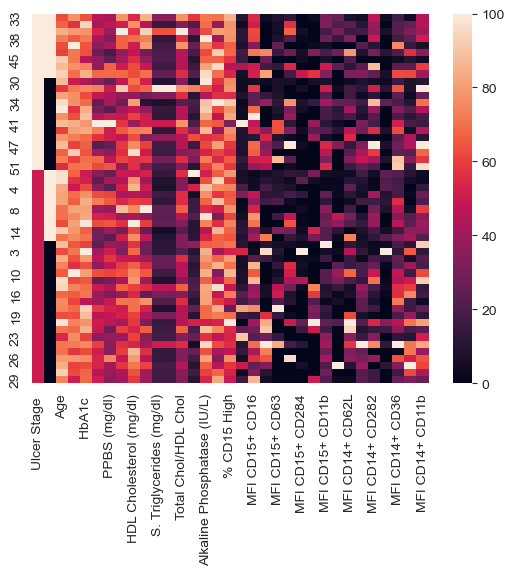

In [9]:
sns.heatmap(Data1[cols])
plt.show()

## Preparing Data

In [10]:
Patient = Data['Patient ID']
Ulcer_stage = Data['Ulcer Stage ']
Data2 = Data.drop(['Patient ID', 'Ulcer Stage '], axis=1)

# remove spaces from column names
for i in [" ", "+", "(", ")", "%", "/", ".", "-"]:
    Data2.columns = Data2.columns.str.replace(i, "_")
Data2

C:\Users\abhin\AppData\Local\Temp\ipykernel_16800\2932035397.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Data2.columns = Data2.columns.str.replace(i, "_")
C:\Users\abhin\AppData\Local\Temp\ipykernel_16800\2932035397.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Data2.columns = Data2.columns.str.replace(i, "_")
C:\Users\abhin\AppData\Local\Temp\ipykernel_16800\2932035397.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Data2.columns = Data2.columns.str.replace(i, "_")
C:\Users\abhin\AppData\Local\Temp\ipy

,Age,BMI,HbA1c_,FBS__mg_dl_,PPBS__mg_dl_,Ulcer_healing_status,Total_Cholesterol__mg_dl_,HDL_Cholesterol__mg_dl_,LDL_Cholesterol__mg_dl_,S__Triglycerides__mg_dl_,...,MFI_CD15__HLA_DR,MFI_CD15__CD11b,MFI_CD14__CD16,MFI_CD14__CD62L,MFI_CD14__CD63,MFI_CD14__CD282,MFI_CD14__CD284,MFI_CD14__CD36,MFI_CD14__HLA_DR,MFI_CD14__CD11b
0,68,25.30,6.7,112,143,1,140,27.4,98,124,...,16.40,269.70,18.60,60.60,63.69,78.20,94.50,528.79,328.00,141.50
1,68,21.50,6.9,81,224,1,122,43.9,73,78,...,2.70,78.10,10.70,174.80,33.90,32.90,80.60,452.00,173.00,91.80
2,62,24.60,8.0,83,198,0,99,32.1,53,99,...,1.00,5659.50,4.80,202.00,24.80,37.80,16.90,481.00,348.50,2837.50
3,44,26.90,13.2,136,271,0,93,38.5,51,106,...,0.00,346.50,18.40,739.00,46.10,51.70,388.00,305.00,1967.00,402.10
4,58,18.90,8.2,116,124,1,145,48.5,93,66,...,0.00,113.60,11.47,406.00,25.00,44.77,86.00,481.00,0.00,428.90
5,57,26.22,10.2,210,322,1,120,25.3,78,147,...,0.00,1446.50,14.00,199.80,18.80,579.00,37.80,451.00,92.30,805.50
6,57,25.00,11.1,245,347,1,153,33.5,109,117,...,0.00,749.00,0.00,68.90,63.30,246.00,44.10,1381.00,15.40,620.30
7,59,24.01,10.5,156,305,0,138,27.1,72,229,...,1.65,911.30,0.00,248.62,12.90,248.70,43.92,639.00,167.00,656.30
8,49,30.82,10.7,134,202,1,246,42.8,186,220,...,0.00,1947.00,0.00,281.06,0.00,419.00,30.36,1119.00,160.00,1814.50
9,52,21.35,8.4,120,253,0,166,37.5,103,230,...,0.00,77.50,116.00,254.00,71.70,379.00,8.73,593.00,1147.00,589.00


### Standardizing Data

In [11]:
col = Data2.columns.tolist()
col.pop(5)
healing_status= Data2["Ulcer_healing_status"]
scaler = StandardScaler()
Scaled = scaler.fit_transform(Data2.drop(["Ulcer_healing_status"],axis=1))
Data2 = pd.DataFrame(Scaled, columns=col)
Data2 = Data2.assign(Ulcer_healing_status = healing_status)

In [12]:
Data2

,Age,BMI,HbA1c_,FBS__mg_dl_,PPBS__mg_dl_,Total_Cholesterol__mg_dl_,HDL_Cholesterol__mg_dl_,LDL_Cholesterol__mg_dl_,S__Triglycerides__mg_dl_,VLDL_Cholesterol__mg_dl_,...,MFI_CD15__CD11b,MFI_CD14__CD16,MFI_CD14__CD62L,MFI_CD14__CD63,MFI_CD14__CD282,MFI_CD14__CD284,MFI_CD14__CD36,MFI_CD14__HLA_DR,MFI_CD14__CD11b,Ulcer_healing_status
0,1.560044,-0.288335,-1.676919,-0.848464,-1.116700,-0.199569,-1.126157,0.151492,-0.510007,-0.500519,...,-1.096393,-0.439148,-0.920580,-0.086383,-0.958315,1.068256,-0.645638,-0.773746,-1.293867,1
1,1.560044,-1.213405,-1.557630,-1.438763,-0.116372,-0.624108,1.047129,-0.583357,-0.829696,-0.812426,...,-1.287893,-0.532092,-0.637028,-0.578037,-1.086490,0.833073,-0.780610,-0.989865,-1.352891,1
2,0.873537,-0.458743,-0.901545,-1.400680,-0.437465,-1.166574,-0.507100,-1.171237,-0.683751,-0.673801,...,4.290589,-0.601506,-0.569493,-0.728224,-1.072626,-0.244706,-0.729637,-0.745163,1.907891,0
3,-1.185985,0.101168,2.199952,-0.391458,0.464065,-1.308087,0.335871,-1.230025,-0.635103,-0.639144,...,-1.019633,-0.441501,0.763844,-0.376688,-1.033296,6.034163,-1.038987,1.511534,-0.984380,0
4,0.415865,-1.846347,-0.782256,-0.772296,-1.351345,-0.081642,1.653015,0.004522,-0.913094,-0.916396,...,-1.252412,-0.523033,-0.062973,-0.724923,-1.052904,0.924439,-0.729637,-1.231081,-0.952552,1
5,0.301447,-0.064371,0.410627,1.017644,1.093900,-0.671279,-1.402757,-0.436388,-0.350162,-0.361893,...,0.079792,-0.493267,-0.574955,-0.827248,0.458687,0.108914,-0.782367,-1.102386,-0.505304,1
6,0.301447,-0.361367,0.947425,1.684111,1.402643,0.107042,-0.322700,0.474826,-0.558655,-0.569831,...,-0.617344,-0.657979,-0.899971,-0.092819,-0.483529,0.215507,0.852265,-1.209609,-0.725247,1
7,0.530283,-0.602372,0.589560,-0.010620,0.883955,-0.246740,-1.165672,-0.612751,0.219720,0.227266,...,-0.455129,-0.657979,-0.453738,-0.924621,-0.475889,0.212462,-0.451925,-0.998231,-0.682493,0
8,-0.613896,1.055450,0.708848,-0.429542,-0.388066,2.300492,0.902243,2.738162,0.157172,0.157953,...,0.580030,-0.657979,-0.373192,-1.137523,0.005971,-0.016968,0.391756,-1.007991,0.692980,1
9,-0.270642,-1.249921,-0.662968,-0.696129,0.241770,0.413653,0.204157,0.298462,0.226670,0.227266,...,-1.288493,0.706772,-0.440380,0.045815,-0.107208,-0.382940,-0.532778,0.368197,-0.762418,0


## Models

### MODEL 1 - Binomial Regression

In [13]:
cols = Data2.columns.tolist()
for i in ['Ulcer_healing_status']:
    cols.remove(i)
cols

['Age',
 'BMI',
 'HbA1c_',
 'FBS__mg_dl_',
 'PPBS__mg_dl_',
 'Total_Cholesterol__mg_dl_',
 'HDL_Cholesterol__mg_dl_',
 'LDL_Cholesterol__mg_dl_',
 'S__Triglycerides__mg_dl_',
 'VLDL_Cholesterol__mg_dl_',
 'Total_Chol_HDL_Chol',
 'ESR',
 'Alkaline_Phosphatase__IU_L_',
 '__CD14_',
 '__CD15_High',
 '_CD15___medium',
 'MFI_CD15__CD16',
 'MFI_CD15__CD62L',
 'MFI_CD15__CD63',
 'MFI_CD15__CD282',
 'MFI_CD15__CD284',
 'MFI_CD15__HLA_DR',
 'MFI_CD15__CD11b',
 'MFI_CD14__CD16',
 'MFI_CD14__CD62L',
 'MFI_CD14__CD63',
 'MFI_CD14__CD282',
 'MFI_CD14__CD284',
 'MFI_CD14__CD36',
 'MFI_CD14__HLA_DR',
 'MFI_CD14__CD11b']

In [14]:
for i in cols:
    formula = 'Ulcer_healing_status ~ ' + i
    model1 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
    result = model1.fit()
    print(result.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       50
Model Family:                  Binomial   Df Model:                            1
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -34.109
Date:                  Sun, 26 Feb 2023   Deviance:                       68.217
Time:                          19:57:32   Pearson chi2:                     52.0
No. Iterations:                       4   Pseudo R-squ. (CS):           0.001040
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5527      0.288

### MODEL 2 - Bayesian Regression

In [15]:
X, Y = Data2[cols], Data2['Ulcer_healing_status']
model2 = BayesianRidge(fit_intercept=False, compute_score=True)
result2 = model2.fit(X, Y)

In [16]:
model2.coef_

array([ 9.38991760e-05,  4.44797335e-04, -1.67934922e-05, -4.63646547e-04,
       -1.80962472e-04,  4.64345387e-04, -3.04627702e-05,  7.92368480e-04,
       -3.31421265e-04, -3.28587303e-04,  5.45062400e-04,  2.05210557e-04,
       -6.58169555e-05,  5.10394593e-04,  3.94720499e-04, -4.90112667e-04,
       -1.27996774e-04, -5.57426691e-04, -6.34246227e-04,  1.63801491e-04,
       -3.23447773e-05, -3.09373372e-04, -3.94084245e-04,  2.25785833e-04,
       -3.49069391e-04, -1.00218985e-03, -1.12462977e-04,  7.82603367e-06,
       -5.96565524e-04, -7.93790529e-04, -7.87976964e-04])

In [17]:
model2.intercept_

0.0

from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM

col = '+'.join(cols)
formula = 'Ulcer_healing_status ~ ' + col
vc = {'Ulcer_healing_status': '0 + C(Ulcer_healing_status)'}
model = BinomialBayesMixedGLM.from_formula(formula,vc,data=Data2)

In [18]:
model2.alpha_

2.7421253319758936

In [19]:
model2.lambda_

22696.189511599212

In [20]:
model2.n_iter_

15

In [21]:
model2.scores_

array([-107.1795149 ,  -61.29190135,  -49.53980743,  -48.21802854,
        -47.93217698,  -47.80853729,  -47.74324552,  -47.70535923,
        -47.68251302,  -47.66882475,  -47.66103978,  -47.65703473,
        -47.655249  ,  -47.65457407,  -47.65435583,  -47.65853779])

### MODEL 3 - Full Logistic Regression - All Clinical Parameters

In [22]:
Data2[cols[:16]]

,Age,BMI,HbA1c_,FBS__mg_dl_,PPBS__mg_dl_,Total_Cholesterol__mg_dl_,HDL_Cholesterol__mg_dl_,LDL_Cholesterol__mg_dl_,S__Triglycerides__mg_dl_,VLDL_Cholesterol__mg_dl_,Total_Chol_HDL_Chol,ESR,Alkaline_Phosphatase__IU_L_,__CD14_,__CD15_High,_CD15___medium
0,1.560044,-0.288335,-1.676919,-0.848464,-1.116700,-0.199569,-1.126157,0.151492,-0.510007,-0.500519,0.530745,4.141392,-1.384554,0.149378,0.892087,-0.522579
1,1.560044,-1.213405,-1.557630,-1.438763,-0.116372,-0.624108,1.047129,-0.583357,-0.829696,-0.812426,-0.849192,-0.951019,-0.595857,1.702905,-0.529385,-0.468847
2,0.873537,-0.458743,-0.901545,-1.400680,-0.437465,-1.166574,-0.507100,-1.171237,-0.683751,-0.673801,-0.849192,0.746452,-0.370515,0.216131,0.368050,-0.276197
3,-1.185985,0.101168,2.199952,-0.391458,0.464065,-1.308087,0.335871,-1.230025,-0.635103,-0.639144,-1.539160,-0.668107,0.868867,-1.246370,-0.926820,1.707965
4,0.415865,-1.846347,-0.782256,-0.772296,-1.351345,-0.081642,1.653015,0.004522,-0.913094,-0.916396,-0.849192,1.595187,1.206881,0.689471,0.571575,0.103861
5,0.301447,-0.064371,0.410627,1.017644,1.093900,-0.671279,-1.402757,-0.436388,-0.350162,-0.361893,0.530745,-0.951019,0.361848,-0.305757,-0.045411,0.704089
6,0.301447,-0.361367,0.947425,1.684111,1.402643,0.107042,-0.322700,0.474826,-0.558655,-0.569831,0.530745,-0.385195,-0.314179,1.399482,0.045134,-0.708676
7,0.530283,-0.602372,0.589560,-0.010620,0.883955,-0.246740,-1.165672,-0.612751,0.219720,0.227266,0.530745,-0.385195,0.474519,0.222199,0.956190,-0.516026
8,-0.613896,1.055450,0.708848,-0.429542,-0.388066,2.300492,0.902243,2.738162,0.157172,0.157953,1.220713,-0.385195,-1.159212,-0.706276,0.832793,-0.664118
9,-0.270642,-1.249921,-0.662968,-0.696129,0.241770,0.413653,0.204157,0.298462,0.226670,0.227266,-0.159223,-0.668107,0.080170,1.217428,0.339204,-0.530442


In [23]:
col3 = '+'.join(cols[:16])
formula = 'Ulcer_healing_status ~ ' + col3
model3 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
result3 = model3.fit()
print(result3.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       35
Model Family:                  Binomial   Df Model:                           16
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -23.728
Date:                  Sun, 26 Feb 2023   Deviance:                       47.456
Time:                          19:57:34   Pearson chi2:                     51.9
No. Iterations:                       6   Pseudo R-squ. (CS):             0.3299
Covariance Type:              nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [24]:
result3.llf

-23.72809308394769

D:\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


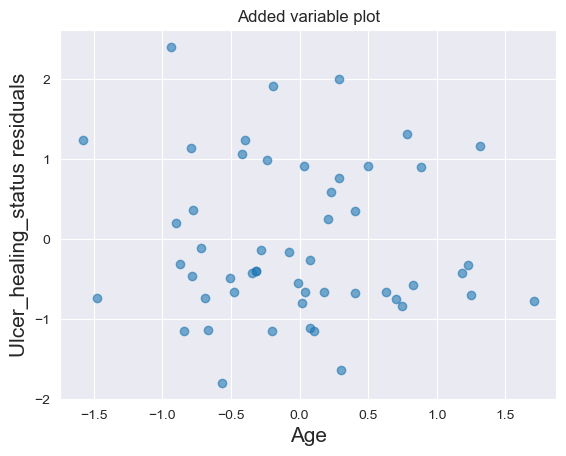

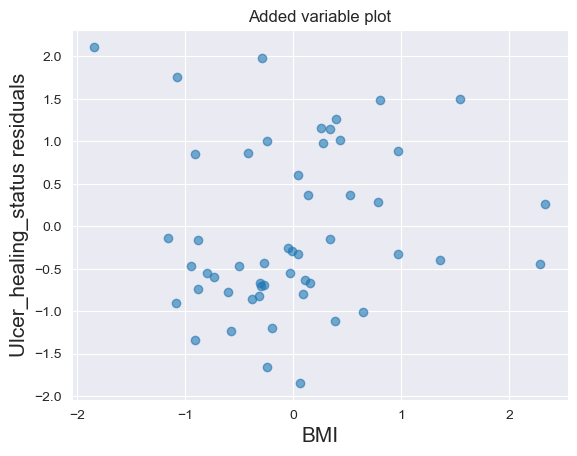

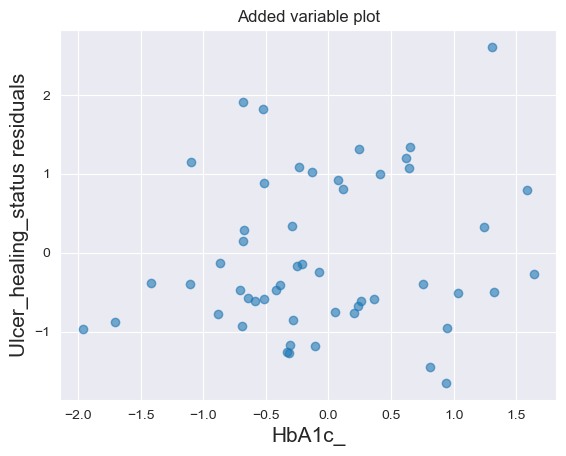

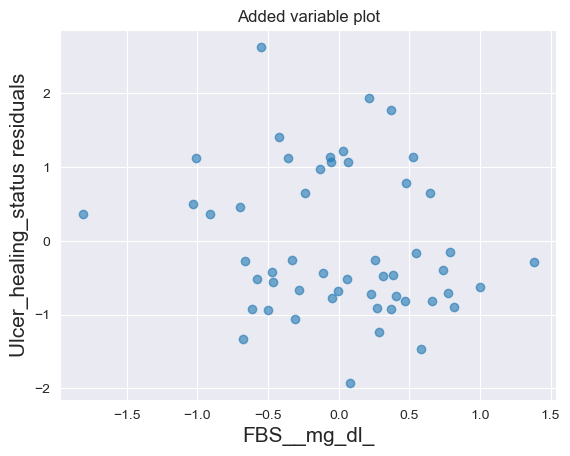

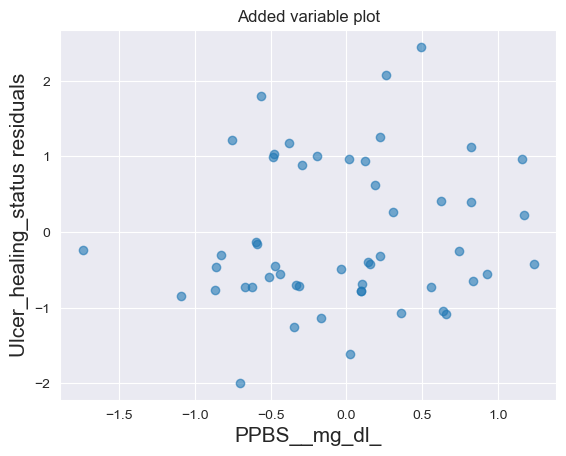

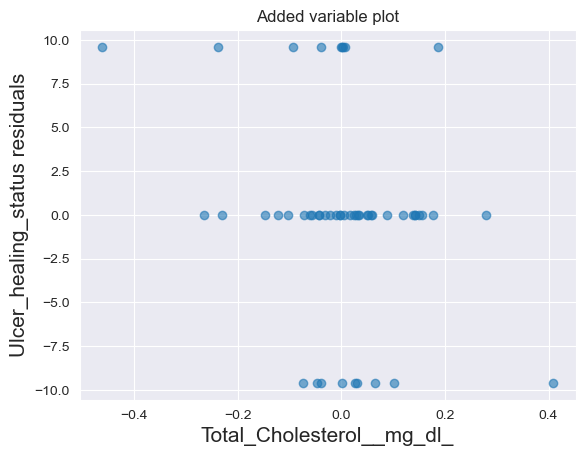

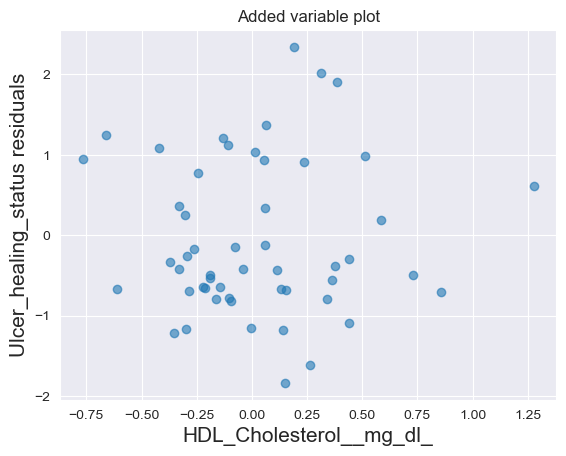

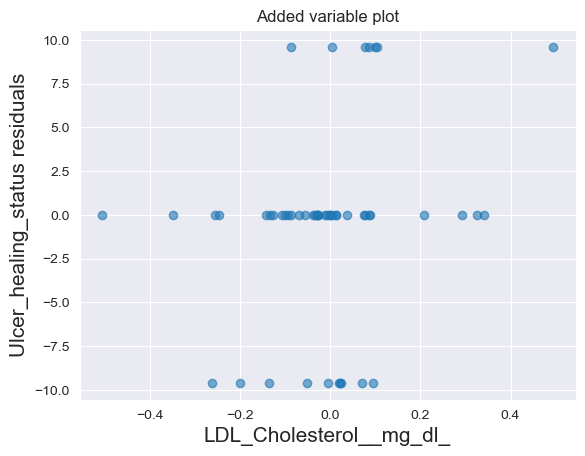

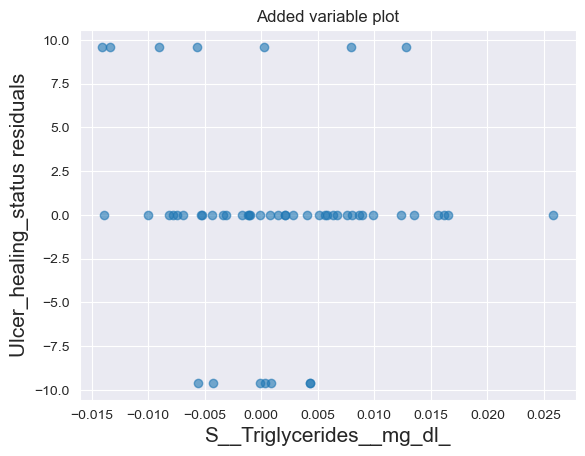

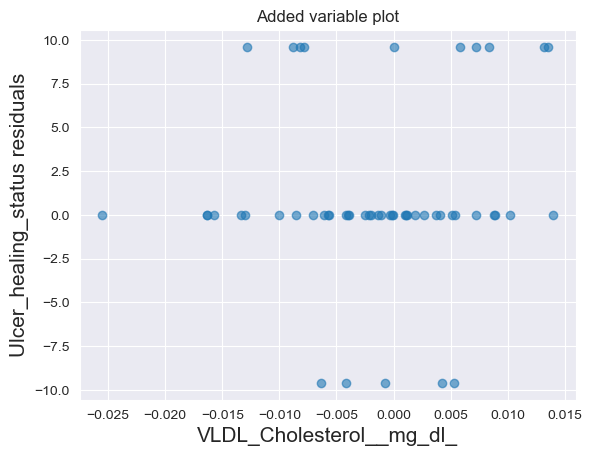

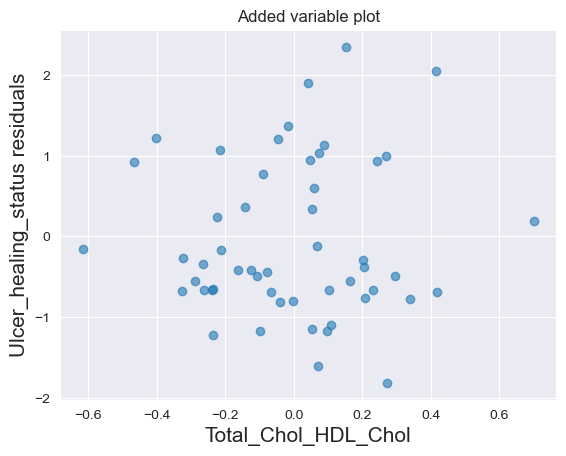

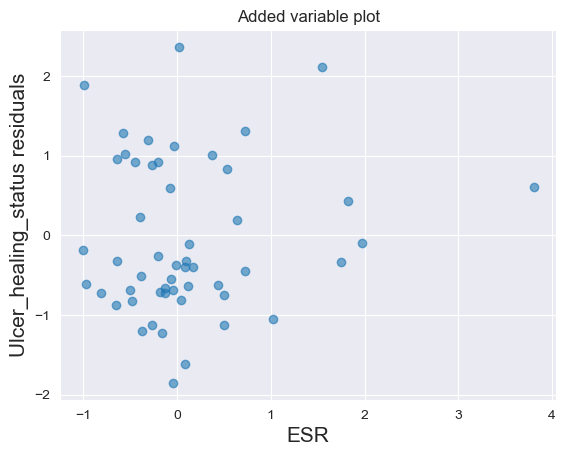

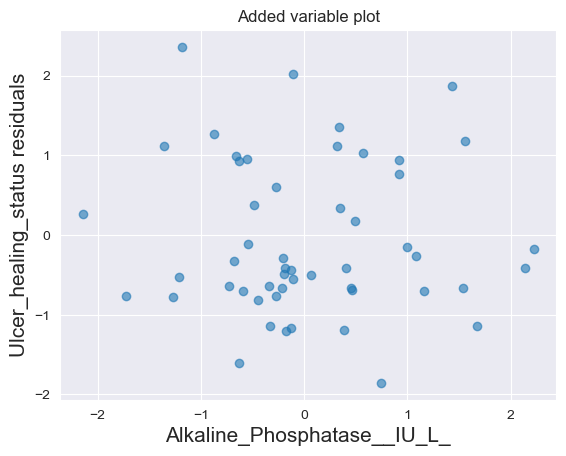

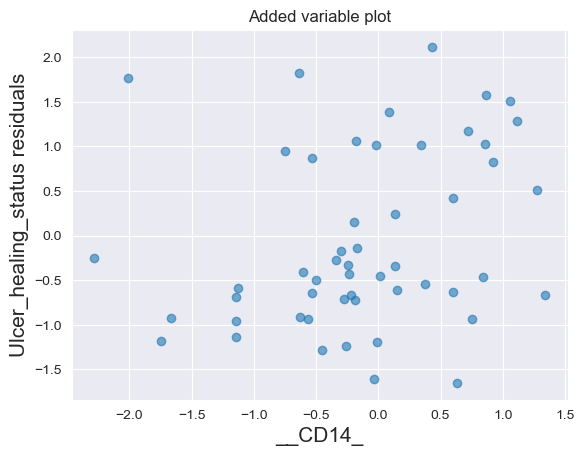

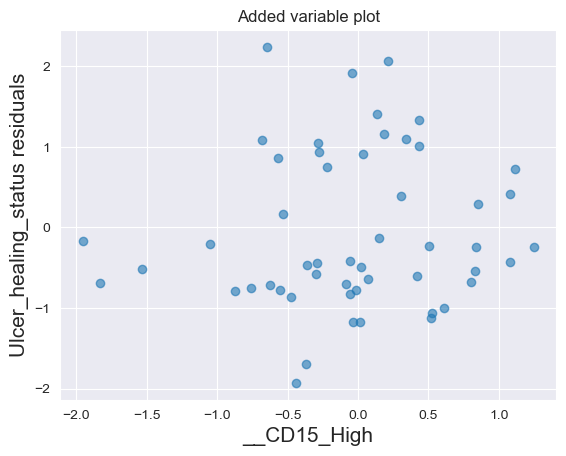

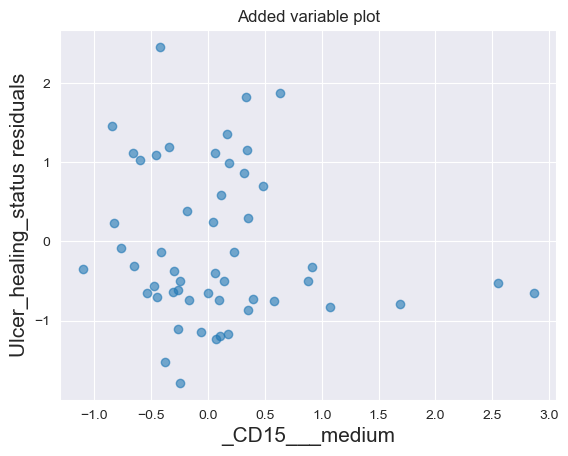

In [25]:
for i in cols[:16]:
    result3.plot_added_variable(i)

In [26]:
col3

'Age+BMI+HbA1c_+FBS__mg_dl_+PPBS__mg_dl_+Total_Cholesterol__mg_dl_+HDL_Cholesterol__mg_dl_+LDL_Cholesterol__mg_dl_+S__Triglycerides__mg_dl_+VLDL_Cholesterol__mg_dl_+Total_Chol_HDL_Chol+ESR+Alkaline_Phosphatase__IU_L_+__CD14_+__CD15_High+_CD15___medium'

### MODEL 4 - Reduced Logistic regression model - Clinical parameter

In [27]:
#parameters selected based on p value less than 0.25 from full model
formula = 'Ulcer_healing_status ~ FBS__mg_dl_+Total_Cholesterol__mg_dl_+LDL_Cholesterol__mg_dl_+S__Triglycerides__mg_dl_+VLDL_Cholesterol__mg_dl_+__CD14_'
model4 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
result4 = model4.fit()
print(result4.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       45
Model Family:                  Binomial   Df Model:                            6
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -27.672
Date:                  Sun, 26 Feb 2023   Deviance:                       55.344
Time:                          19:57:45   Pearson chi2:                     54.0
No. Iterations:                       5   Pseudo R-squ. (CS):             0.2201
Covariance Type:              nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

### MODEL 5 - Stepwise Reduced Logistic regression model - Clinical parameter

In [28]:
#  RFE -Recursive feature elimination

X, Y = Data2[cols[:16]], Data2['Ulcer_healing_status']
model = LogisticRegression()
for j in range(5,0,-1):
    rfe = RFE(model, n_features_to_select=j, step=1)
    selector = rfe.fit(X, Y)
    n=0
    # Step selected parameters
    ssp = []
    for i in selector.support_:
        if i:
            ssp.append(cols[n])
        n = n + 1
    ssp = '+'.join(ssp)
    formula = 'Ulcer_healing_status ~ ' + ssp
    model5 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
    result5 = model5.fit()
    print(result5.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       46
Model Family:                  Binomial   Df Model:                            5
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -28.251
Date:                  Sun, 26 Feb 2023   Deviance:                       56.502
Time:                          19:57:45   Pearson chi2:                     49.9
No. Iterations:                       5   Pseudo R-squ. (CS):             0.2026
Covariance Type:              nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

In [29]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [30]:
selector.ranking_

array([14,  7, 10,  8, 13, 11,  9,  3,  2,  6,  1, 12, 16,  4, 15,  5])

### MODEL 6 - Full logistic regression model - All Immune parameters

In [31]:
Data2[cols[16:]]

,MFI_CD15__CD16,MFI_CD15__CD62L,MFI_CD15__CD63,MFI_CD15__CD282,MFI_CD15__CD284,MFI_CD15__HLA_DR,MFI_CD15__CD11b,MFI_CD14__CD16,MFI_CD14__CD62L,MFI_CD14__CD63,MFI_CD14__CD282,MFI_CD14__CD284,MFI_CD14__CD36,MFI_CD14__HLA_DR,MFI_CD14__CD11b
0,-1.619963,-0.671779,-0.326655,-0.366798,0.229446,0.684036,-1.096393,-0.439148,-0.920580,-0.086383,-0.958315,1.068256,-0.645638,-0.773746,-1.293867
1,-1.559768,-0.519783,-0.394527,-0.717054,0.980186,-0.410176,-1.287893,-0.532092,-0.637028,-0.578037,-1.086490,0.833073,-0.780610,-0.989865,-1.352891
2,-1.663701,-0.534103,-0.494369,-0.662602,-0.297139,-0.545954,4.290589,-0.601506,-0.569493,-0.728224,-1.072626,-0.244706,-0.729637,-0.745163,1.907891
3,-1.581088,2.319660,-0.258379,-0.849503,5.653039,-0.625824,-1.019633,-0.441501,0.763844,-0.376688,-1.033296,6.034163,-1.038987,1.511534,-0.984380
4,-1.551800,-0.247704,-0.275523,-0.577246,-0.454878,-0.625824,-1.252412,-0.523033,-0.062973,-0.724923,-1.052904,0.924439,-0.729637,-1.231081,-0.952552
5,0.177025,-0.482960,-0.222073,-0.157822,0.369394,-0.625824,0.079792,-0.493267,-0.574955,-0.827248,0.458687,0.108914,-0.782367,-1.102386,-0.505304
6,-0.321586,-0.284527,0.150065,-0.687620,-0.425465,-0.625824,-0.617344,-0.657979,-0.899971,-0.092819,-0.483529,0.215507,0.852265,-1.209609,-0.725247
7,-0.885398,-0.356126,-0.471073,-0.849503,-0.259187,-0.494039,-0.455129,-0.657979,-0.453738,-0.924621,-0.475889,0.212462,-0.451925,-0.998231,-0.682493
8,0.364489,-0.853233,-0.702121,-0.849503,-0.229537,-0.625824,0.580030,-0.657979,-0.373192,-1.137523,0.005971,-0.016968,0.391756,-1.007991,0.692980
9,1.652796,-0.853233,-0.146435,1.254975,-0.163121,-0.625824,-1.288493,0.706772,-0.440380,0.045815,-0.107208,-0.382940,-0.532778,0.368197,-0.762418


In [32]:
col3 = '+'.join(cols[16:])
formula = 'Ulcer_healing_status ~ ' + col3
model3 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
result3 = model3.fit()
print(result3.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       36
Model Family:                  Binomial   Df Model:                           15
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -20.929
Date:                  Sun, 26 Feb 2023   Deviance:                       41.857
Time:                          19:57:47   Pearson chi2:                     37.1
No. Iterations:                       7   Pseudo R-squ. (CS):             0.3983
Covariance Type:              nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

### MODEL 7 - Reduced logistic regression model - Selected Immune parameters

In [33]:
# parameters selected based on p value less than 0.25 from full model
formula = 'Ulcer_healing_status ~ MFI_CD15__CD11b+ MFI_CD14__CD16+ MFI_CD14__CD62L+ MFI_CD14__CD63+ MFI_CD14__CD282+ MFI_CD14__CD284+ MFI_CD14__HLA_DR+ MFI_CD14__CD11b'
model7 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
result7 = model7.fit()
print(result7.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       43
Model Family:                  Binomial   Df Model:                            8
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -23.989
Date:                  Sun, 26 Feb 2023   Deviance:                       47.977
Time:                          19:57:47   Pearson chi2:                     49.3
No. Iterations:                       6   Pseudo R-squ. (CS):             0.3231
Covariance Type:              nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

### MODEL 8 - Stepwise reduced logistic regression model - immune parameters

In [34]:
#  RFE -Recursive feature elimination

X, Y = Data2[cols[16:]], Data2['Ulcer_healing_status']
model = LogisticRegression()
for j in range(5,0,-1):
    rfe = RFE(model, n_features_to_select=j, step=1)
    selector = rfe.fit(X, Y)
    n=0
    # Step selected parameters
    ssp = []
    for i in selector.support_:
        if i:
            ssp.append(cols[16+n])
        n = n + 1
    ssp = '+'.join(ssp)
    formula = 'Ulcer_healing_status ~ ' + ssp
    model8 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
    result8 = model8.fit()
    print(result8.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       46
Model Family:                  Binomial   Df Model:                            5
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -25.103
Date:                  Sun, 26 Feb 2023   Deviance:                       50.206
Time:                          19:57:48   Pearson chi2:                     43.6
No. Iterations:                       6   Pseudo R-squ. (CS):             0.2935
Covariance Type:              nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.

### MODEL9 - Combined model 1 - Selected parameters of step models

In [35]:
formula = 'Ulcer_healing_status ~ S__Triglycerides__mg_dl_+Total_Chol_HDL_Chol+MFI_CD14__CD63+MFI_CD14__CD11b'
model9 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
result9 = model9.fit()
print(result9.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       47
Model Family:                  Binomial   Df Model:                            4
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -26.223
Date:                  Sun, 26 Feb 2023   Deviance:                       52.446
Time:                          19:57:48   Pearson chi2:                     47.3
No. Iterations:                       6   Pseudo R-squ. (CS):             0.2624
Covariance Type:              nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

### MODEL10 - Stepwise reduced logistic regression model - combined parameters

In [36]:
#  RFE -Recursive feature elimination
col10= ['S__Triglycerides__mg_dl_', 'Total_Chol_HDL_Chol', 'MFI_CD14__CD63', 'MFI_CD14__CD11b']

X, Y = Data2[col10], Data2['Ulcer_healing_status']
model = LogisticRegression()
for j in range(5,0,-1):
    rfe = RFE(model, n_features_to_select=j, step=1)
    selector = rfe.fit(X, Y)
    n=0
    # Step selected parameters
    ssp = []
    for i in selector.support_:
        if i:
            ssp.append(col10[n])
        n = n + 1
    ssp = '+'.join(ssp)
    formula = 'Ulcer_healing_status ~ ' + ssp
    model10 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
    result10 = model10.fit()
    print(result10.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       47
Model Family:                  Binomial   Df Model:                            4
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -26.223
Date:                  Sun, 26 Feb 2023   Deviance:                       52.446
Time:                          19:57:49   Pearson chi2:                     47.3
No. Iterations:                       6   Pseudo R-squ. (CS):             0.2624
Covariance Type:              nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

### MODEL11 - Step selected parameters - All

In [37]:
#  RFE -Recursive feature elimination

X, Y = Data2[cols], Data2['Ulcer_healing_status']
model = LogisticRegression()
for j in range(5,0,-1):
    rfe = RFE(model, n_features_to_select=j, step=1)
    selector = rfe.fit(X, Y)
    n=0
    # Step selected parameters
    ssp = []
    for i in selector.support_:
        if i:
            ssp.append(cols[n])
        n = n + 1
    ssp = '+'.join(ssp)
    formula = 'Ulcer_healing_status ~ ' + ssp
    model11 = smf.glm(formula=formula, data=Data2, family=sm.families.Binomial())
    result11 = model11.fit()
    print(result11.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Ulcer_healing_status   No. Observations:                   52
Model:                              GLM   Df Residuals:                       46
Model Family:                  Binomial   Df Model:                            5
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -22.068
Date:                  Sun, 26 Feb 2023   Deviance:                       44.137
Time:                          19:57:49   Pearson chi2:                     50.0
No. Iterations:                       6   Pseudo R-squ. (CS):             0.3713
Covariance Type:              nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte